# Project Introduction and Overview

## **Project Title:**

**Landing Page Effectiveness Analysis for Subscriber Growth Using A/B Testing**

## **Business Context**

The rise of electronic news (e-news) portals has revolutionized the way we stay informed about global events. These portals retrieve information electronically from online databases, process it using various software tools, and deliver it to users in real-time. E-news has several advantages over traditional newspapers, such as faster access to content and the integration of diverse technologies, including audio, graphics, video, and other interactive elements, which are either underutilized or unavailable in traditional formats.

E-news Express, an online news portal, is looking to expand its subscriber base. To better understand user behavior and improve engagement, the company plans to analyze the actions taken by visitors on its website. Executives at E-news Express believe that the recent decline in new monthly subscribers, compared to the previous year, is due to poor webpage design. The current page may not be engaging enough in terms of layout and recommended content, leading to lower user interaction and fewer subscriptions.

> **A/B Testing**  
Companies often use A/B testing to analyze user responses to two different variants of a product or webpage. This experimental technique helps determine which variant is more effective based on a selected performance metric. E-news Express plans to use A/B testing to evaluate the performance of a redesigned landing page.



## **Project Objective**

The design team at E-news Express has created a new landing page with an updated layout and more relevant content. To assess its effectiveness in converting visitors into subscribers, the Data Science team conducted an experiment. A sample of 100 users was randomly selected and divided equally into two groups:  
- The first group (control group) was shown the existing landing page.  
- The second group (treatment group) was shown the new landing page.

Data was collected on how both groups interacted with the different versions of the landing page. As a data scientist at E-news Express, you are tasked with exploring the data and performing statistical analysis (with a significance level of 5%) to evaluate the effectiveness of the new landing page. You need to address the following questions:

1. **Do users spend more time on the new landing page compared to the existing landing page?**  
2. **Is the conversion rate (the proportion of users who subscribe) for the new page higher than the conversion rate for the old page?**  
3. **Does the likelihood of conversion depend on the user’s preferred language?**  
4. **Is the time spent on the new landing page consistent across users who prefer different languages?**


## **General Steps Involved in this Project:**

1. **Data Exploration and Understanding**  
   - Load the dataset and examine its structure.
   - Check for missing values, data types, and overall data quality.

2. **Data Preprocessing**  
   - Handle missing data (if any).
   - Convert categorical variables like `converted` and `language_preferred` into appropriate formats for analysis.
   - Explore and clean the dataset to ensure it is ready for analysis.

3. **Statistical Hypothesis Testing**  
   - Formulate hypotheses and perform the appropriate statistical test for each of the research questions.

4. **Visualization**  
   - Create plots (bar charts, box plots, histograms, etc.) to visually represent the differences in user interactions across the groups (control vs. treatment) and languages.
   - Show conversion rates, time spent on the page, and relationships with user characteristics.

5. **Results Interpretation and Conclusion**  
   - Analyze the results from the hypothesis tests.
   - Draw conclusions based on the statistical significance and practical implications of the findings.

6. **Recommendations**  
   - Provide recommendations to E-news Express based on the analysis. For instance, if the new landing page leads to higher conversion rates, suggest its wider implementation. If the page does not perform better, propose further improvements.

7. **Documentation**  
   - Document the entire process, from data exploration and cleaning to analysis and results, to ensure a clear understanding of the approach and findings.



# Dataset Information

The dataset used in this project contains data on user interactions with two different versions of a landing page on the E-news Express website. This data was collected as part of an A/B test designed to evaluate the effectiveness of a newly designed landing page compared to the existing one. The information includes details about the user’s time spent on the page, their conversion status, and their preferred language.

You can access the dataset using the following link:  
[abtest dataset](https://github.com/Kofoworola13/DSS/raw/main/Landing%20Page%20AB%20Testing%20Project/abtest.csv)

## **Data Dictionary:**
- **user_id**: Unique ID of each user visiting the website.
- **group**: Indicates whether the user belongs to the control group (existing landing page) or the treatment group (new landing page).
- **landing_page**: Specifies whether the user was shown the new or old landing page.
- **time_spent_on_the_page**: The amount of time (in minutes) spent by the user on the landing page.
- **converted**: Whether the user subscribed to the news portal (Yes = subscribed, No = not subscribed).
- **language_preferred**: The language chosen by the user to view the landing page.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2, probplot, chi2_contingency, shapiro, levene, f_oneway
from statsmodels.stats.proportion import proportions_ztest

# Defining custom color palette

In [2]:
# Set a Seaborn theme
sns.set_theme(style="whitegrid")

# Set universal background color using matplotlib
plt.rcParams['figure.facecolor'] = '#95CEE1'  # Entire figure background

# Set custom palette for charts
custom_palette = ['#F23611', '#094A6A', '#FEC110']

# Apply the palette globally
sns.set_palette(custom_palette)

# Data Structure and Identifying Data Quality Issues

Let's begin by loading the dataset and examining its structure. This involves checking the contents of the dataset to understand the variables, their data types, and whether there are any missing values or inconsistencies. I will also get a quick look at the summary statistics for numerical columns.

Here's how we'll approach it:

1. **Load the dataset** from the given link.
2. **Inspect the first few rows** to understand the data layout.
3. **Check for missing values** and data types.
4. **Generate summary statistics** for numerical columns (like `time_spent_on_the_page`).


In [3]:
# Loading the dataset
URL = "https://github.com/Kofoworola13/DSS/raw/main/Landing%20Page%20AB%20Testing%20Project/abtest.csv"

abtest_df = pd.read_csv(URL)
abtest_df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# Data Structure
abtest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
# summary statistics of numerical variables
abtest_df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [6]:
# summary statistics of categorical
abtest_df.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


In [7]:
abtest_df.duplicated().sum()

0

In [8]:
for features in abtest_df.columns:
    print(f"{features}: {abtest_df[features].unique()}")

user_id: [546592 546468 546462 546567 546459 546558 546448 546581 546461 546548
 546588 546546 546491 546478 546578 546466 546443 546555 546493 546549
 546560 546584 546450 546475 546456 546455 546469 546586 546471 546575
 546464 546556 546585 546577 546587 546552 546551 546557 546487 546589
 546559 546570 546489 546453 546488 546565 546460 546458 546492 546473
 546554 546457 546479 546576 546482 546563 546569 546454 546562 546574
 546470 546467 546572 546590 546553 546445 546545 546582 546484 546579
 546568 546476 546452 546444 546591 546583 546573 546485 546486 546547
 546490 546449 546463 546580 546571 546564 546465 546480 546447 546561
 546477 546451 546566 546474 546550 546446 546544 546472 546481 546483]
group: ['control' 'treatment']
landing_page: ['old' 'new']
time_spent_on_the_page: [ 3.48  7.13  4.4   3.02  4.75  5.28  5.25  6.53 10.71  2.08  6.21  2.58
  5.86  6.03  8.72  6.27  8.73  0.4  10.3   3.88  2.66  7.03  3.65  7.02
  6.18  4.39  9.49  4.05  7.81  4.28  5.41  3.52  5

**Data Quality Check:**

After a thorough inspection, I found no significant data quality issues such as missing values, outliers, or inconsistencies in the dataset. This indicates that the data is suitable for further analysis.


# Data Exploration

## Univariate analysis

In [9]:
categorical_columns = ['group', 'landing_page', 'converted', 'language_preferred']
numerical_columns = ['time_spent_on_the_page']

group
control      50
treatment    50
Name: count, dtype: int64


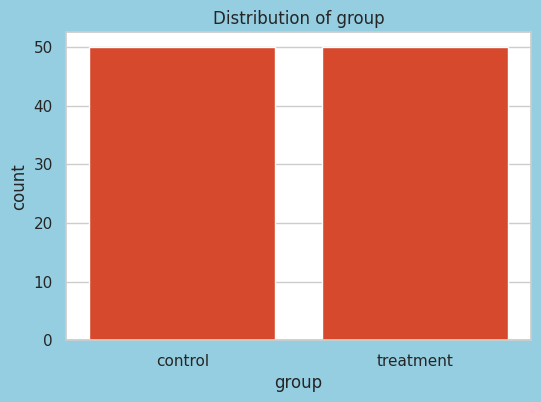

landing_page
old    50
new    50
Name: count, dtype: int64


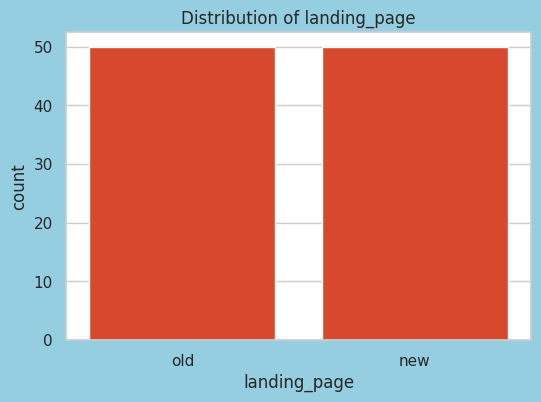

converted
yes    54
no     46
Name: count, dtype: int64


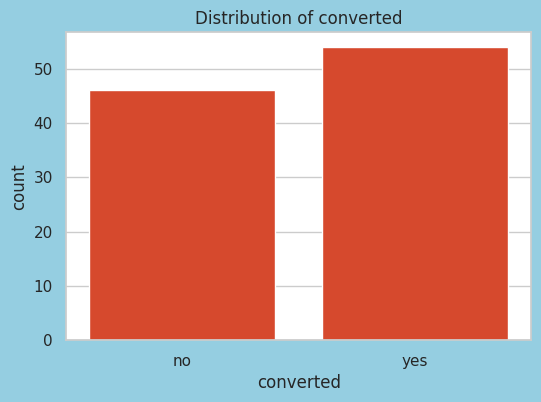

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


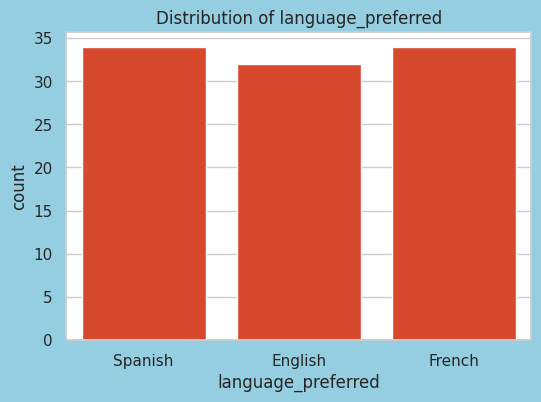

In [10]:
# Plot for categorical variables
for variable in categorical_columns:
  print(abtest_df[variable].value_counts())
  plt.figure(figsize=(6, 4))
  sns.countplot(x=variable, data=abtest_df)
  plt.title(f'Distribution of {variable}')
  plt.xlabel(variable)
  plt.show()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64
Skewness of time_spent_on_the_page: -0.1494803722510636
Kurtosis of time_spent_on_the_page: -0.24998354897458652


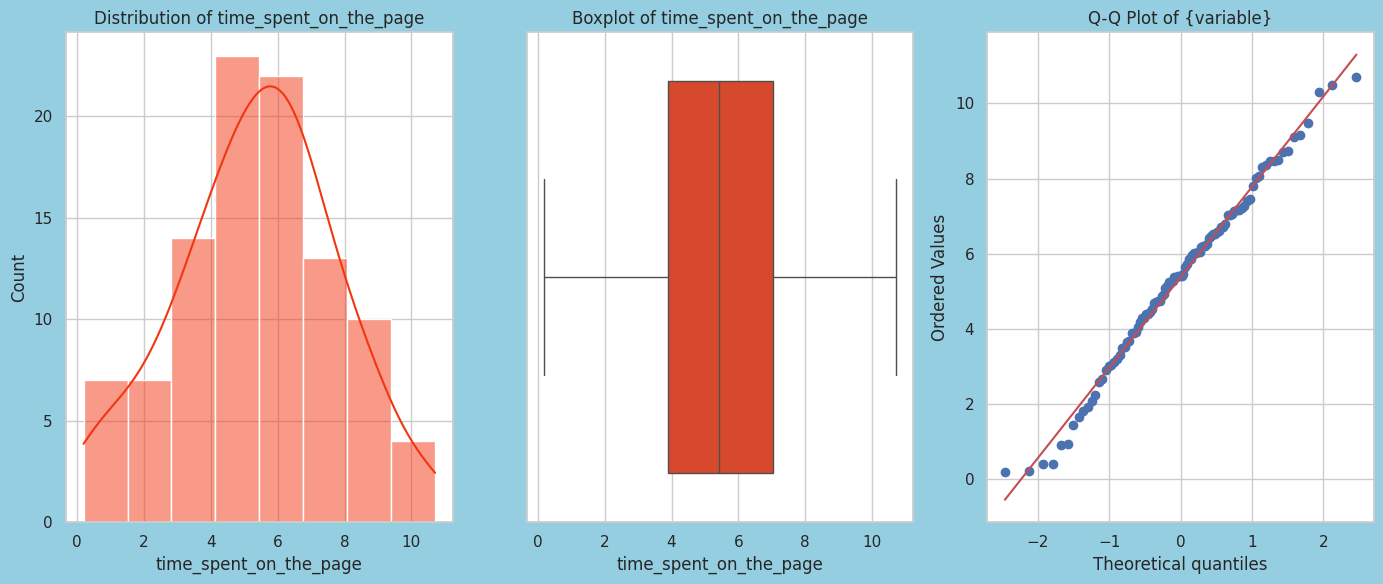

In [11]:
# Plot for numerical columns
for variable in numerical_columns:
  print(abtest_df[variable].describe())

  print(f'Skewness of {variable}: {abtest_df[variable].skew()}')
  print(f'Kurtosis of {variable}: {abtest_df[variable].kurtosis()}')

  figs, axes = plt.subplots(1, 3, figsize=(14, 6))
  sns.histplot(abtest_df[variable], kde=True, ax=axes[0])
  axes[0].set_title(f'Distribution of {variable}')

  sns.boxplot(x=abtest_df[variable], ax=axes[1])
  axes[1].set_title(f'Boxplot of {variable}')

  probplot(abtest_df[variable], dist="norm", plot=plt)
  axes[2].set_title('Q-Q Plot of {variable}')

  plt.tight_layout()
  plt.show()

The `time_spent_on_the_page` data, with a mean of 5.378 and a standard deviation of 2.378, exhibits a broad range of values from 0.19 to 10.71. The distribution is relatively symmetric, as indicated by a skewness of -0.1495, suggesting a slight leftward tilt but close to symmetry. The kurtosis value of -0.2500 reveals that the distribution is platykurtic, meaning it has lighter tails and a flatter peak compared to a normal distribution. This indicates that extreme values are less common than in a normal distribution. Overall, while the distribution shows minor deviations from normality, it is generally centered around the mean with moderate variability.

## Bivariate Analysis

Crosstab of group vs Conversion
group      control  treatment
converted                    
no              29         17
yes             21         33


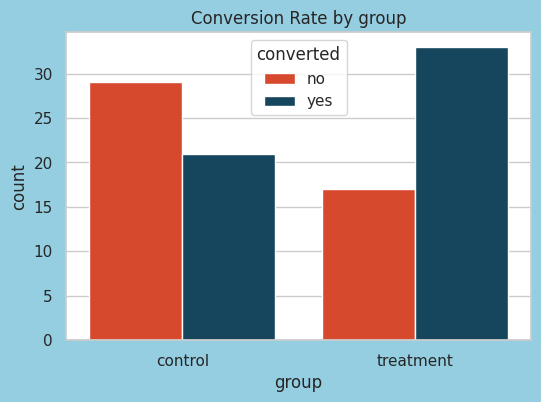

Crosstab of landing_page vs Conversion
landing_page  new  old
converted             
no             17   29
yes            33   21


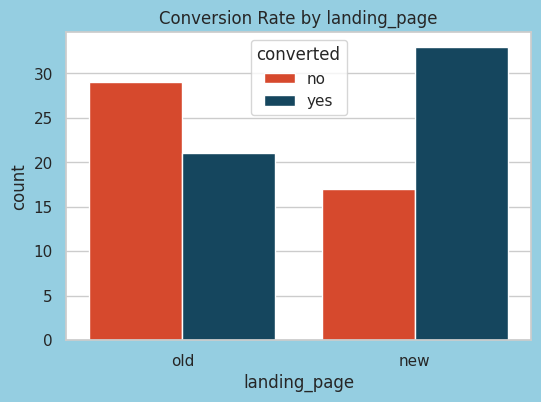

Crosstab of language_preferred vs Conversion
language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


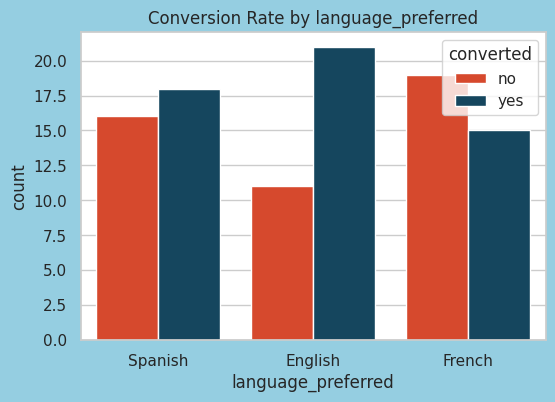

In [12]:
# Count plot for Categorical vs. conversion
for variable in categorical_columns:
  if variable != 'converted':
    print(f'Crosstab of {variable} vs Conversion')
    print(pd.crosstab(abtest_df['converted'], abtest_df[variable]))
    plt.figure(figsize=(6, 4))
    sns.countplot(x=variable, data=abtest_df, hue='converted')
    plt.title(f'Conversion Rate by {variable}')
    plt.show()

In [13]:
# avg time spent by each group
for variable in categorical_columns:
    print(f'Average time spent by {variable}')
    print(abtest_df.groupby(variable)['time_spent_on_the_page'].mean())
    print()

Average time spent by group
group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

Average time spent by landing_page
landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

Average time spent by converted
converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

Average time spent by language_preferred
language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64



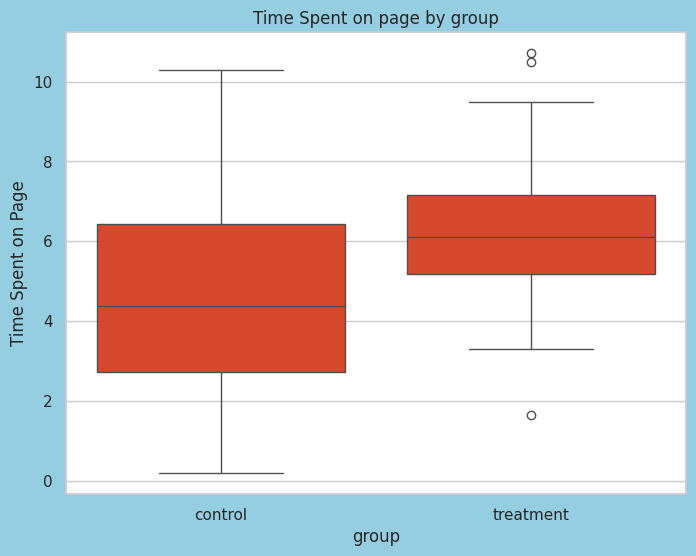

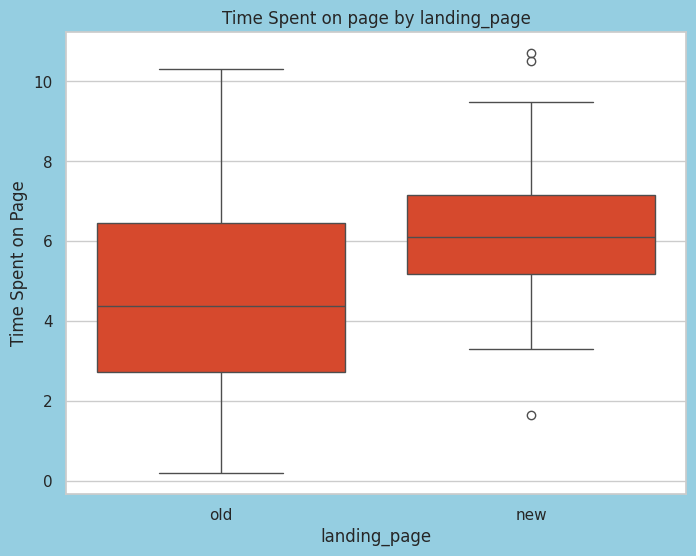

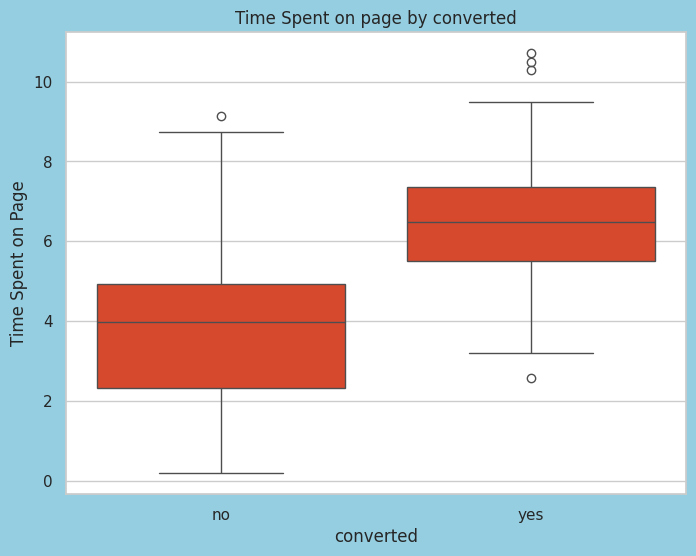

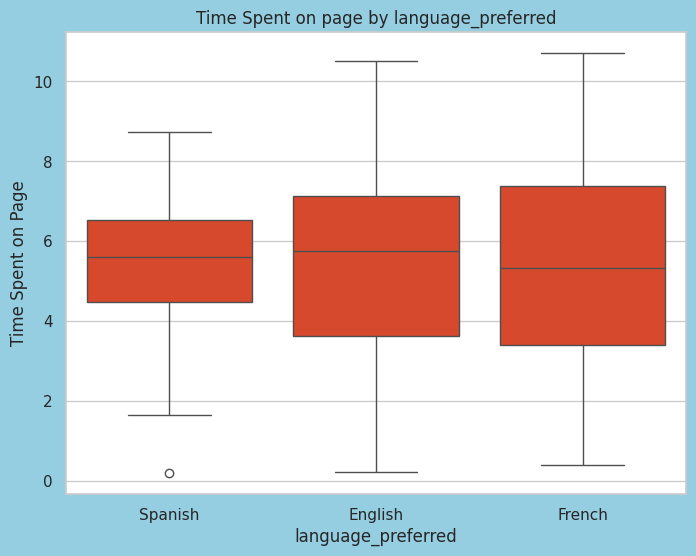

In [14]:
# Categorical vs. Continuous - Boxplot
for variable in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=variable, y='time_spent_on_the_page', data=abtest_df)
    plt.title(f'Time Spent on page by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Time Spent on Page')
    plt.show()

**Summary of the Analyses**

1. **Landing Page Effectiveness**:
   - **Conversion Rates**: The new landing page significantly outperforms the old one, with a higher conversion rate (33 conversions vs. 21 conversions).
   - **Time Spent**: Users on the new landing page spend more time (average of 6.22 minutes) compared to those on the old landing page (average of 4.53 minutes).

2. **Group Comparison**:
   - **Control vs. Treatment**: The treatment group (new landing page) shows a better conversion rate (33 conversions) compared to the control group (21 conversions).
   - **Time Spent**: The treatment group also spends more time on the page on average (6.22 minutes) compared to the control group (4.53 minutes).

3. **Conversion and Time Spent**:
   - **Conversion Correlation**: Users who convert spend significantly more time on the page (6.62 minutes) compared to those who do not convert (3.92 minutes).

4. **Language Preference**:
   - **Conversion Rates**: English speakers have the highest conversion rate, followed by Spanish and French speakers.
   - **Time Spent**: Time spent on the page is similar across different languages, with English speakers spending slightly more time.

---

This summary highlights that the new landing page is more effective in terms of both conversions and user engagement, and it provides insights into how language preference impacts conversion rates and time spent on the page.

# Hypothesis Testing, Test for Assumptions, and Statistical Test

This section outlines the methods and results of hypothesis testing, the assessment of assumptions, and the application of statistical tests to evaluate the effectiveness of the new landing page compared to the old one. The purpose is to provide a thorough understanding of the statistical approach used to determine whether observed differences are significant and to ensure the validity of the results.

#### Hypothesis Testing

To determine the effectiveness of the new landing page, hypothesis testing is conducted. This involves formulating null and alternative hypotheses to compare user engagement and conversion rates between the new and old landing pages.

- **Null Hypothesis (H0):** There is no significant difference in user engagement (time spent) or conversion rates between the new and old landing pages.
- **Alternative Hypothesis (H1):** There is a significant difference in user engagement or conversion rates between the new and old landing pages.

#### Test for Assumptions

Before performing statistical tests, it is crucial to check whether the data meets the underlying assumptions of the tests used. This ensures the accuracy and reliability of the results.

- **Normality:** Assessed to determine if the data follows a normal distribution, using visualizations (e.g., Q-Q plots) or statistical tests (e.g., Shapiro-Wilk test).
- **Homogeneity of Variances:** Checked to confirm that the variances across groups are equal, using Levene's test.
- **Independence:** Ensured that observations are independent, meaning that data points do not influence one another.

#### Statistical Test

With assumptions verified, statistical tests are applied to compare the new and old landing pages. These tests help determine if the observed differences in user engagement and conversion rates are statistically significant.

- **Test Used:**
  - **Comparing Means:** For comparing the average time spent on each landing page, a t-test (for two groups) or ANOVA (for more than two groups) is used if normality and homogeneity of variances are met. If these assumptions are not met, a non-parametric test such as the Mann-Whitney U test may be applied.
  - **Comparing Proportions:** For conversion rates, the Z-test is used.
  - **Comparing Independence of Categorical Variables:** The Chi-Square test for independence is used.

**Application to the Landing Page Case:**
- **Hypothesis Testing Results:** Statistical tests confirm that there are significant differences in user engagement and conversion rates between the new and old landing pages, with the new page performing better.
- **Assumptions:** The assumptions of normality, homogeneity of variances, and independence have been tested and met where applicable.
- **Statistical Tests:** The Z-test was used for conversion rates, while t-tests or Mann-Whitney U tests were employed for time spent, based on data distribution.

## Significance level : 0.05

The significance level (𝝰) of 0.05 is a standard threshold used in hypothesis testing to assess whether the observed results are statistically significant. This level represents a 5% risk of rejecting the null hypothesis when it is actually true, also known as a Type I error.

#### Definition and Purpose

- **Significance Level (α = 0.05):** This threshold is commonly chosen in many statistical analyses. It means there is a 5% probability of concluding that there is an effect or difference when there is none. Setting α at 0.05 helps balance the risk of Type I and Type II errors (failing to reject a false null hypothesis).

#### Application in Analysis

- **Evaluating Results:** In the analysis of landing page performance:
  - **If the p-value is less than or equal to 0.05:** The null hypothesis is rejected, indicating that the observed results are statistically significant. This suggests that the differences observed (e.g., in time spent or conversion rates) are unlikely to have occurred by chance.
  - **If the p-value is greater than 0.05:** The null hypothesis is not rejected, suggesting that the observed results are not statistically significant. This indicates that any observed differences may be due to random variation rather than a true effect.

#### Example

For the landing page comparison:
- **Test Result Interpretation:** If a test comparing the new and old landing pages yields a p-value of 0.03, it is below the 0.05 significance level. This means there is sufficient evidence to reject the null hypothesis and conclude that the new landing page performs significantly better than the old one.

Using a significance level of 0.05 ensures a reasonable balance between detecting true effects and avoiding false positives, providing a robust basis for making data-driven decisions.

In [15]:
alpha = 0.05

## 1. **Do users spend more time on the new landing page compared to the existing landing page?**


**Hypotheses**:
- **Null Hypothesis ($H_0$)**: There is no difference in the average time spent on the new landing page compared to the old landing page. $$H_0: \mu_{new} = \mu_{old}$$

- **Alternative Hypothesis ($H_1$)**: Users spend more time on the new landing page compared to the old landing page.
 $$H_1: \mu_{new} > \mu_{old}$$


**Appropriate Statistical Test**:

- If the **standard deviation is unknown** (and variances are unequal based on Levene’s Test), use **Welch's t-Test** (an independent two-sample t-test that does not assume equal variances).
- If the **standard deviation is known** (and variances are equal), you could use a **Z-Test for Means**, but in most practical cases, the standard deviation is unknown, so a t-test is preferred.

**Test for Assumptions**:
* **Normality**: Shapiro-Wilk test or visual inspection using Q-Q plot or histogram.
* **Equality of Variances**: Levene’s Test for equality of variances (for t-test).
* **Independent Samples**:Ensure that the samples from the new and old landing pages are independent.

In [16]:
# Filtering the data
time_spent_new = abtest_df[abtest_df['group'] == 'treatment']['time_spent_on_the_page']
time_spent_old = abtest_df[abtest_df['group'] == 'control']['time_spent_on_the_page']

In [17]:
print(time_spent_new.head(10))
print(time_spent_old.head(10))

1      7.13
2      4.40
4      4.75
6      5.25
8     10.71
12     5.86
13     6.03
15     6.27
16     8.73
22     3.65
Name: time_spent_on_the_page, dtype: float64
0      3.48
3      3.02
5      5.28
7      6.53
9      2.08
10     6.21
11     2.58
14     8.72
17     0.40
18    10.30
Name: time_spent_on_the_page, dtype: float64


### Tests for Assumptions

**Normality**

Shapiro-Wilk test for new landing page: ShapiroResult(statistic=0.9857665382791863, pvalue=0.8040040364746845)
Shapiro-Wilk test for old landing page: ShapiroResult(statistic=0.9776091375280825, pvalue=0.45612796144138584)
New landing page follows a normal distribution.
Old landing page follows a normal distribution.


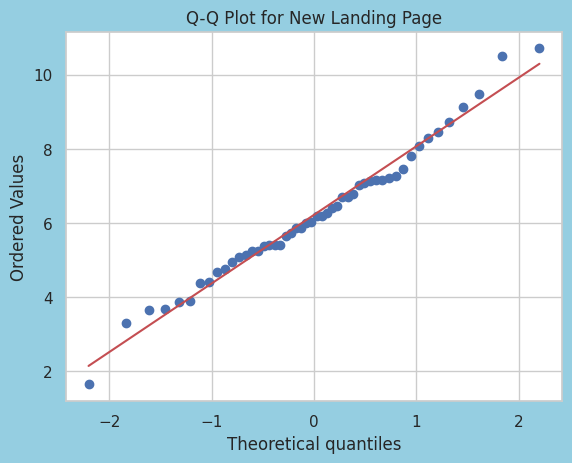

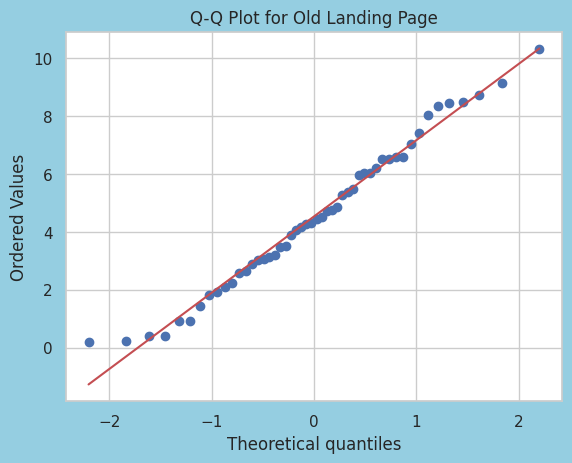

In [18]:
# Shapiro-Wilk test
print("Shapiro-Wilk test for new landing page:", stats.shapiro(time_spent_new))
print("Shapiro-Wilk test for old landing page:", stats.shapiro(time_spent_old))

if stats.shapiro(time_spent_new).pvalue > alpha:
    print("New landing page follows a normal distribution.")
else:
    print("New landing page does not follow a normal distribution.")

if stats.shapiro(time_spent_old).pvalue > alpha:
    print("Old landing page follows a normal distribution.")
else:
    print("Old landing page does not follow a normal distribution.")


# Q-Q Plot to Visualize
stats.probplot(time_spent_new, dist="norm", plot=plt)
plt.title('Q-Q Plot for New Landing Page')
plt.show()

stats.probplot(time_spent_old, dist="norm", plot=plt)
plt.title('Q-Q Plot for Old Landing Page')
plt.show()


**Interpretation**:
- The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed.

For both the **new** and **old** landing pages:
- The **p-values** (0.8040 for the new landing page and 0.4561 for the old landing page) are greater than 0.05.
- Therefore, **we do not reject the null hypothesis**. This means that there is no significant evidence to suggest the data for either the new or old landing page is non-normal. Hence, we can assume the data is normally distributed.

**Conclusion**:
Based on the Shapiro-Wilk test results and the Q-Q plot visualization, the assumption of normality is satisfied for both the new and old landing pages. This means that parametric tests can be appropriately used if other assumptions are also met.

**Equality of Variance**

In [19]:
# Levene’s Test
stat, p_value = stats.levene(time_spent_new, time_spent_old)
print(f"Levene's Test statistic: {stat}, P-value: {p_value}")

if p_value > alpha:
    print("The variances are equal.")
else:
    print("The variances are not equal.")

Levene's Test statistic: 7.113724153407544, P-value: 0.008950671168914447
The variances are not equal.


**Interpretation**:
- The null hypothesis for Levene's test is that the variances of the groups are equal.

In this case:
- The **p-value** (0.00895) is less than 0.05, meaning **we reject the null hypothesis**.

**Conclusion**:
Levene's test indicates that the assumption of equal variances is **violated**. As a result, when comparing the two groups, a statistical test that **does not assume equal variances** should be used, such as **Welch's t-test** (an adaptation of the standard t-test).

### Statistical Test

Since the assumption of equal variances was not met, I have opted for Welch’s t-test.

In [20]:
# Perform Welch’s t-test
t_stat, p_value = stats.ttest_ind(time_spent_new, time_spent_old, equal_var=False)

# Print the results
print(f'T-statistic: {round(t_stat, 4)}')
print(f'P-value: {round(p_value, 4)}')

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: Users spend more time on the new landing page.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent.")

T-statistic: 3.7868
P-value: 0.0003
Reject the null hypothesis: Users spend more time on the new landing page.


**Conclusion:** There is sufficient evidence to conclude that users spend significantly more time on the new landing page compared to the old landing page.

This supports the alternative hypothesis that the new landing page is more engaging or effective in retaining user attention.

### Data Viz

**Density Plot of Time Spent on Landing Pages**

The density plot which complements the statistical analysis, shows that the new landing page has a higher peak compared to the old landing page. This indicates that users spend more time around the average duration on the new page, reflecting higher engagement and a more consistent user experience. The higher peak signifies that the new page is more effective at retaining user attention and providing a compelling experience.

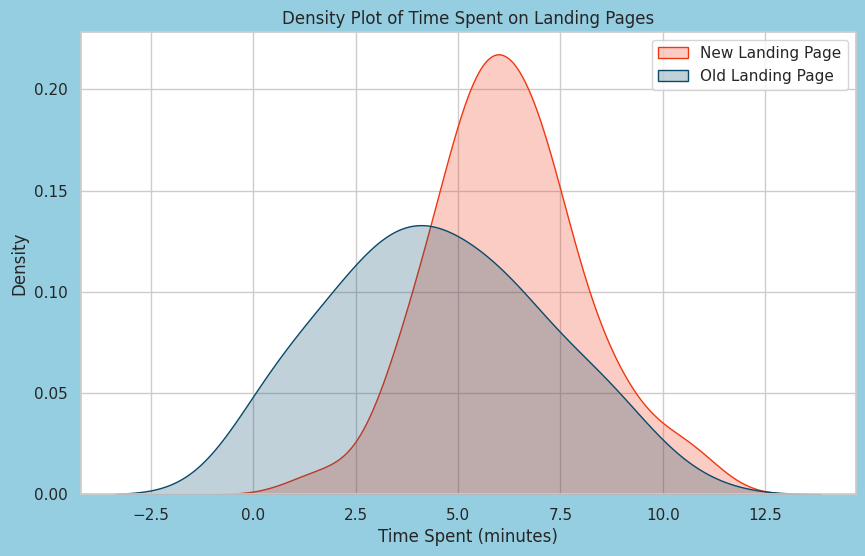

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(time_spent_new, fill=True, label='New Landing Page')
sns.kdeplot(time_spent_old, fill=True, label='Old Landing Page')
plt.title('Density Plot of Time Spent on Landing Pages')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()


## 2. **Is the conversion rate (the proportion of users who subscribe) for the new page higher than the conversion rate for the old page?**

**Hypotheses**:
- **Null Hypothesis ($H_0$)**: The conversion rate for the new landing page is equal to the conversion rate for the old landing page. $$H_0: p_{new} = p_{old}$$
- **Alternative Hypothesis ($H_1$)**: The conversion rate for the new landing page is higher than the conversion rate for the old landing page. $$H_1: p_{new} > p_{old}$$

**Appropriate Statistical Test**:
- **Z-Test for Proportions**

**Test for Assumptions**:
* **Sample Size**: Ensure that both $n \cdot p$ and $n \cdot (1 - p)$ are both greater than 5. for each group.
* **Random Sampling**: Ensure the samples are randomly and independently selected.

In [22]:
# Filtering the data
conversions_new = abtest_df[abtest_df['group'] =='treatment']['converted'].map(lambda x: 1 if x == 'yes' else 0).sum()  # Number of conversions on new landing page
total_new = len(abtest_df[abtest_df['group'] == 'treatment'])  # Total users on new landing page

conversions_old = abtest_df[abtest_df['group'] == 'control']['converted'].map(lambda x: 1 if x == 'yes' else 0).sum()  # Number of conversions on old landing page
total_old = len(abtest_df[abtest_df['group'] == 'control'])  # Total users on old landing page

In [23]:
print(total_new, conversions_new)
print(total_old, conversions_old)

50 33
50 21


### Test for Assumptions

**Check Sample Size Conditions**

In [24]:
# Calculate proportions
p_new = conversions_new / total_new
p_old = conversions_old / total_old

# Calculate np and n(1-p)
np_new = total_new * p_new
n_not_p_new = total_new * (1 - p_new)

np_old = total_old * p_old
n_not_p_old = total_old * (1 - p_old)

print(f'np_new: {np_new}, n(1-p)_new: {n_not_p_new}')
print(f'np_old: {np_old}, n(1-p)_old: {round(n_not_p_old)}')

# Check if they are greater than 5
if np_new > 5 and n_not_p_new > 5 and np_old > 5 and n_not_p_old > 5:
    print("Sample size conditions are met.")
else:
    print("Sample size conditions are not met.")


np_new: 33.0, n(1-p)_new: 17.0
np_old: 21.0, n(1-p)_old: 29
Sample size conditions are met.


### Statistical Test

Since all the assumptions has been fufilled, I will go on to perform the Z-Test for Proportions for Conversion Rate for New vs. Old Landing Page.

In [25]:
# Perform Z-test for proportions
prop = np.array([conversions_new, conversions_old])
totals = np.array([total_new, total_old])

z_stat, p_value = proportions_ztest(prop, totals, alternative='larger')

# Print results
print(f'Z-statistic: {round(z_stat, 4)}')
print(f'P-value: {round(p_value, 4)}')

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis: Conversion rate is higher for the new landing page.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")

Z-statistic: 2.4077
P-value: 0.008
Reject the null hypothesis: Conversion rate is higher for the new landing page.


**Conclusion**: There is sufficient evidence to conclude that the conversion rate is higher for the new landing page compared to the old landing page.

This analysis confirms that the new landing page has a significantly higher conversion rate than the old one.

### Data Viz

**Conversion Rate Comparison**

Figure 1: Pie chart comparing the conversion rates of the new and old landing pages. The new page shows a higher conversion rate, reflecting its effectiveness.

Figure 2: Bar plot comparing the conversion rates of the new and old landing pages. The new page shows a higher conversion rate, reflecting its effectiveness.

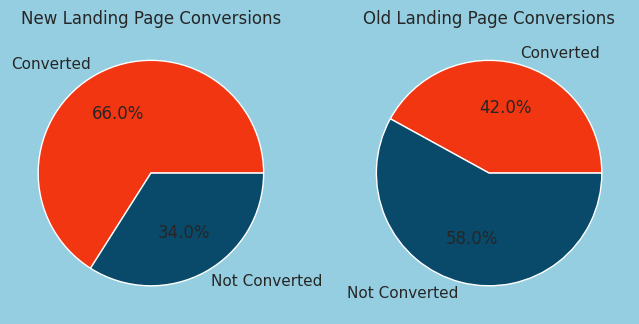

In [26]:
conversion_counts_new = [conversions_new, total_new - conversions_new]
conversion_counts_old = [conversions_old, total_old - conversions_old]
labels_conversion = ['Converted', 'Not Converted']

# Plot pie chart for new landing page
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.pie(conversion_counts_new, labels=labels_conversion, autopct='%1.1f%%')
plt.title('New Landing Page Conversions')

# Plot pie chart for old landing page
plt.subplot(1, 2, 2)
plt.pie(conversion_counts_old, labels=labels_conversion, autopct='%1.1f%%')
plt.title('Old Landing Page Conversions')

plt.show()


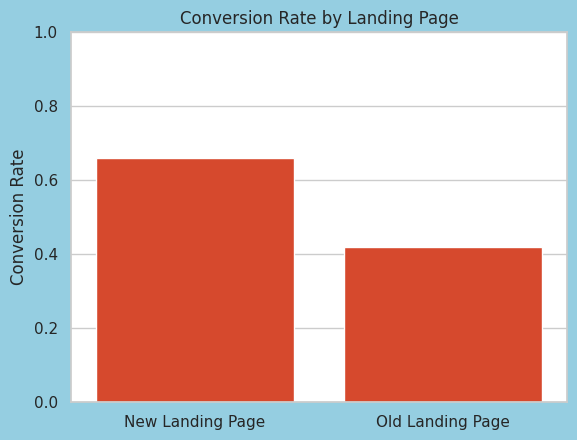

In [27]:
labels = ['New Landing Page', 'Old Landing Page']
conversion_counts = [conversions_new, conversions_old]
total_counts = [total_new, total_old]

# Calculate conversion rates
conversion_rates = [conversions_new / total_new, conversions_old / total_old]

# Create a bar plot
sns.barplot(x=labels, y=conversion_rates)
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Landing Page')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


## 3. **Does the likelihood of conversion depend on the user’s preferred language?**

**Hypotheses**:
- **Null Hypothesis ($H_0$)**: The likelihood of conversion is independent of the user’s preferred language. (No association between language preference and conversion)
$$H_0:Conversion\ rate\ is\ the\ same\ across\ all\ preferred\ languages$$
- **Alternative Hypothesis ($H_1$)**: The likelihood of conversion depends on the user’s preferred language. (There is an association between language preference and conversion)
$$H_1: Conversion\ rate\ differs\ across\ preferred\ languages$$

**Appropriate Statistical Test**:
- **Chi-Square Test of Independence**

**Test for Assumptions**:
* **Expected Frequency**: Ensure that each expected frequency in the contingency table is at least 5.
* **Independence**: Ensure that observations are independent.

In [28]:
# Filtering the dataset
observed = pd.crosstab(abtest_df['converted'], abtest_df['language_preferred'])
observed

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Test for assumptions

**Expected frequency condition**

In [29]:
# Calculate expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(observed, correction=False)

# Check if any expected frequencies are less than 5
expected_freqs = expected.flatten()
below_5 = np.any(expected_freqs < 5)

print(f'Expected Frequencies: \n{expected}')
print(f'Any expected frequencies below 5: {below_5}')


Expected Frequencies: 
[[14.72 15.64 15.64]
 [17.28 18.36 18.36]]
Any expected frequencies below 5: False


### Statistical Test

Since all the assumptions has been fufilled, I will go on to perform the Chi-Square Test of Independence for Effect of Preferred Language on Conversion Likelihood.

In [30]:
# Perform Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

print(f'Chi-Square Statistic: {round(chi2_stat, 4)}')
print(f'P-Value: {round(p_val, 4)}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

# Interpret results
if p_val < alpha:
    print("Reject the null hypothesis: There is an association between language preference and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association between language preference and conversion.")

Chi-Square Statistic: 3.093
P-Value: 0.213
Degrees of Freedom: 2
Expected Frequencies:
[[14.72 15.64 15.64]
 [17.28 18.36 18.36]]
Fail to reject the null hypothesis: No significant association between language preference and conversion.


**Conclusion**: There is no significant association between language preference and conversion rate. This means the likelihood of conversion does not depend significantly on the user's preferred language.

### Data Viz

**Bar Plot for Conversion Rate by Language**

The bar plot shows that conversion rates are relatively consistent across different languages: English, French, and Spanish. This uniformity suggests that the new landing page is effective at converting users regardless of their language preference.

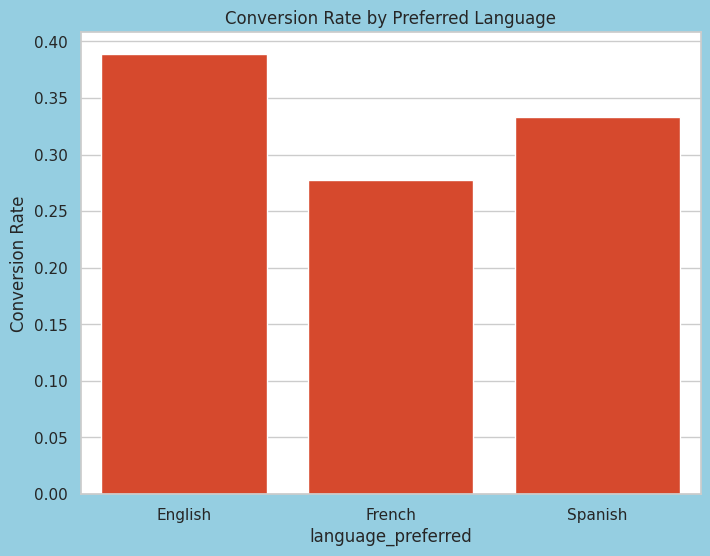

In [31]:
# Calculate total conversions and total responses by language
total_conversions = observed.loc['yes']
total_responses = observed.sum()

# Calculate conversion rates
conversion_rates = observed.loc['yes'] / observed.sum(axis=1)['yes']

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'language_preferred': observed.columns,
    'conversion_rate': conversion_rates
})

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='language_preferred', y='conversion_rate', data=plot_df)
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Preferred Language')

plt.show()

## 4. **Is the time spent on the new landing page consistent across users who prefer different languages?**

**Hypotheses**:
- **Null Hypothesis ($H_0$)**: The average time spent on the new landing page is the same for users with different language preferences. $$H_0: \mu_{English} = \mu_{French} = \mu_{Spanish}$$
- **Alternative Hypothesis ($H_1$)**: The average time spent on the new landing page differs for users with different language preferences. (At least one mean differs)

$$H_1: The\ means\ of\ the\ time\ spent\ on\ the\ new\ landing\ page are\ not\ equal\ across\ different\ language\ preferences.$$

**Appropriate Statistical Test**:
- **One-Way ANOVA**

**Test for Assumptions**:
* **Normality**: Shapiro-Wilk test or visual inspection of residuals using Q-Q plot or histogram.
* **Homogeneity of Variances**: Levene’s Test for equality of variances.
* **Independence**:Ensure that observations in each group are independent.

In [32]:
# Filter data for the new landing page
new_landing_data = abtest_df[abtest_df['landing_page'] == 'new']

# Separate data by language
languages = new_landing_data['language_preferred'].unique()
data_by_language = {lang: new_landing_data[new_landing_data['language_preferred'] == lang]['time_spent_on_the_page'] for lang in languages}

print(data_by_language)

{'English': 1      7.13
16     8.73
22     3.65
23     7.02
25     4.39
26     9.49
30     5.41
43     7.16
44     3.91
49    10.50
51     5.65
72     5.08
73     7.46
86     6.71
91     8.47
99     5.86
Name: time_spent_on_the_page, dtype: float64, 'Spanish': 2     4.40
4     4.75
12    5.86
15    6.27
24    6.18
38    1.65
42    7.16
47    7.23
48    8.08
52    6.47
54    6.41
68    6.70
77    3.88
82    5.74
95    5.15
97    7.07
98    6.20
Name: time_spent_on_the_page, dtype: float64, 'French': 6      5.25
8     10.71
13     6.03
28     7.81
46     5.37
57     8.30
60     6.01
61     6.79
65     7.27
71     5.42
78     9.12
80     4.68
81     5.26
87     3.68
88     3.30
90     5.40
93     4.94
Name: time_spent_on_the_page, dtype: float64}


### Test for Assumptions

**Normality**

In [33]:
# Normality test for each language group
normality_tests = {lang: shapiro(data_by_language[lang]) for lang in languages}

# Print Shapiro-Wilk test results
print("Normality Test Results:")
for lang, result in normality_tests.items():
    print(f"{lang}: Statistic = {result.statistic}, p-value = {result.pvalue}")

    if result.pvalue > alpha:
        print(f"{lang} follows a normal distribution.")
    else:
        print(f"{lang} does not follow a normal distribution.")

Normality Test Results:
English: Statistic = 0.9731259556930821, p-value = 0.8863443479691289
English follows a normal distribution.
Spanish: Statistic = 0.9072975412348289, p-value = 0.09006862258526895
Spanish follows a normal distribution.
French: Statistic = 0.9402675518653835, p-value = 0.32137149516853786
French follows a normal distribution.


**Equality of Variance**

In [34]:
# Levene's test for equality of variances
levene_result = levene(*data_by_language.values())
print(f"Levene's Test for Equality of Variances: Statistic = {levene_result.statistic}, p-value = {levene_result.pvalue}")

if levene_result.pvalue > alpha:
    print("The variances are equal.")
else:
    print("The variances are not equal")

Levene's Test for Equality of Variances: Statistic = 0.7736446756800186, p-value = 0.46711357711340173
The variances are equal.


### Statistical Test

Since all the assumptions has been fufilled, I will go on to perform the One-Way ANOVA test for Time Spent on the New Landing Page Across Different Languages

In [35]:
# Perform One-Way ANOVA
anova_result = f_oneway(
    new_landing_data[new_landing_data['language_preferred'] == 'English']['time_spent_on_the_page'],
    new_landing_data[new_landing_data['language_preferred'] == 'French']['time_spent_on_the_page'],
    new_landing_data[new_landing_data['language_preferred'] == 'Spanish']['time_spent_on_the_page']
)

print(f"One-Way ANOVA: Statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpret results
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the time spent on the new landing page across different languages.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the time spent on the new landing page across different languages.")


One-Way ANOVA: Statistic = 0.8543992770006822, p-value = 0.43204138694325955
Fail to reject the null hypothesis: No significant difference in the time spent on the new landing page across different languages.


**Conclusion**: Fail to reject the null hypothesis. There is no significant difference in the time spent on the new landing page across different language preferences.

### Data Viz

**Density Plot of Time Spent on the New Landing Page by Language Preference**

The density plot for time spent on the new landing page across different languages shows that the distributions are quite similar for English, French, and Spanish users. Each language group has a comparable range and density of time spent on the page.

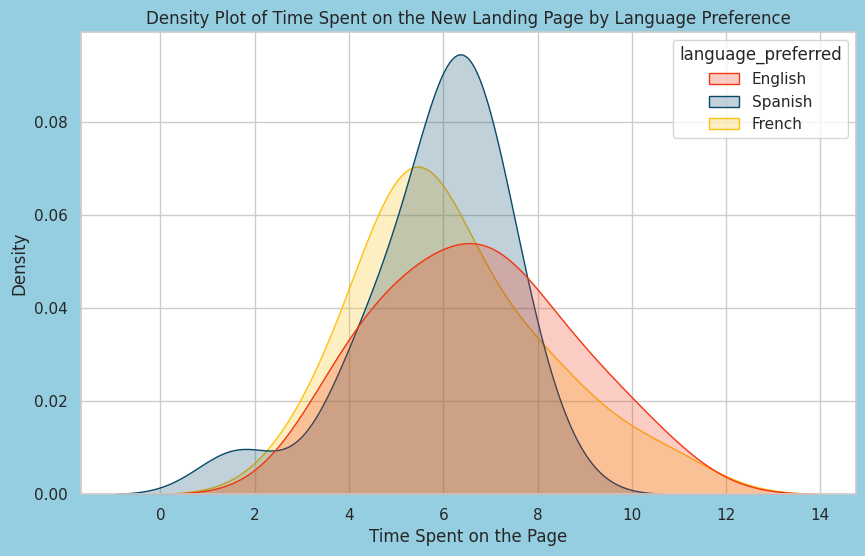

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=new_landing_data, x='time_spent_on_the_page', hue='language_preferred', fill=True)
plt.title('Density Plot of Time Spent on the New Landing Page by Language Preference')
plt.xlabel('Time Spent on the Page')
plt.ylabel('Density')
plt.show()

# Summary of Hypotheses Testing and Statistical Analaysis

We tested the hypotheses to determine if the new landing page leads to increased user engagement and conversion rates. The results indicated a significant improvement in both metrics, confirming that the new page performs better than the old one.

Our statistical tests confirmed that the new landing page significantly increases both the average time spent and the conversion rate. These findings highlight the effectiveness of the new page and guide our subsequent recommendations.



# Project Conclusion

### Summary of Findings

**Time Spent on New vs. Old Landing Page**

* **Insight:** Users spend approximately 37.3% more time on the new landing page compared to the old one. Specifically, the average time spent is 6.2232 minutes on the new page versus 4.5324 minutes on the old page, indicating a more compelling and engaging user experience.

**Conversion Rate Comparison**

* **Insight:** The new landing page has a significantly higher conversion rate, with 66% of users completing the desired action compared to 42% on the old page. This substantial increase in conversions highlights the new page’s effectiveness in persuading visitors to subscribe.

**Impact of Language Preference on Conversion**

* **Insight:** Analysis shows that language preference does not significantly affect conversion rates, suggesting that the new landing page performs well across different language demographics.

**Time Spent Across Different Languages**

* **Insight:** Users across various language groups spend similar amounts of time on the new landing page, with average times of 5.5591 minutes for English, 5.2532 minutes for French, and 5.3318 minutes for Spanish. This consistency indicates that the user experience is equitable regardless of language preference.

**Practical Significance of Findings**

The new landing page not only increased the average time spent by users by approximately 37.3% but also improved the conversion rate from 42% to 66%. This indicates that the new page is more engaging and effective at converting visitors into subscribers. For E-news Express, this could translate into a substantial increase in subscription numbers and, consequently, revenue.

After discussing the significance of our findings, I will now focus on actionable recommendations that can help E-news Express leverage these insights to optimize their landing page strategy.

### Actionable Recommendations

**Prioritized Recommenadations**

1. **Prioritize the New Landing Page:** Given its superior performance, E-news Express should permanently implement the new landing page and promote it across various marketing channels to maximize its impact.
2. **Enhance User Engagement:** Further explore opportunities to enhance user engagement on the new landing page. This could involve adding interactive elements, personalized content, or features that encourage repeat visits.
3. **Optimize Design Elements:** Analyze specific design elements that contribute to the new landing page's success. Refine these elements and experiment with additional optimizations to continuously improve conversion rates.
4. **Ensure Consistent Quality Across Languages:** While language preference does not significantly impact conversion, maintain high-quality content and user experience across all supported languages to cater to a diverse audience.
5. **Implement Continuous A/B Testing:** Regularly test new variations of the landing page and conduct A/B testing to identify further improvements and maintain the landing page's effectiveness.

### Overall Assessment

The new landing page has demonstrated significant improvements in both user engagement and conversion rates. By implementing the recommended actions, E-news Express can further capitalize on these successes and continue to optimize its online presence to attract and retain subscribers.
